### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Inverse Transform

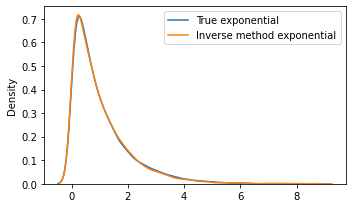

In [4]:
N_SAMPLES = 10000

# Generate random samples
uniform_samples = np.random.uniform(0, 1, size=(N_SAMPLES,))
exponential_samples = np.random.exponential(1, size=(N_SAMPLES,))
inverse_method_exponential_samples = -np.log(uniform_samples)

plt.figure(figsize=(5, 3))
sns.distplot(exponential_samples, hist=False, label="True exponential")
sns.distplot(inverse_method_exponential_samples, hist=False, label="Inverse method exponential")
plt.legend()
plt.tight_layout()
plt.show()

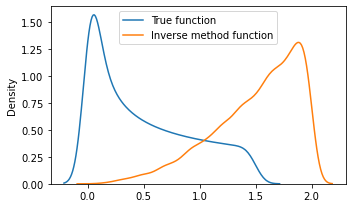

In [5]:
# Generate random samples
uniform_samples = np.random.uniform(0, 1, size=(N_SAMPLES,))
function_sample_space = np.linspace(0, 2, N_SAMPLES)
function_values = np.power(function_sample_space, 2)*3/8
inverse_method_function_values = np.power(8*uniform_samples, 1/3)

plt.figure(figsize=(5, 3))
sns.distplot(function_values, hist=False, label="True function")
sns.distplot(inverse_method_function_values, hist=False, label="Inverse method function")
plt.legend()
plt.tight_layout()
plt.show()

### Accept-Reject

In [6]:
def normal_pdf(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

def laplace_pdf(x):
    return 1/2*np.exp(-np.abs(x))

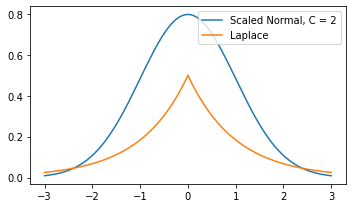

In [7]:
# Acceptance-rejection sampling
N_SAMPLES = 10000
C = 2
function_sample_space = np.linspace(-3, 3, N_SAMPLES)
normal_samples = normal_pdf(function_sample_space)
laplace_samples = laplace_pdf(function_sample_space)

# Plot Densities
plt.figure(figsize=(5, 3))
plt.plot(function_sample_space, C*normal_samples, label=f"Scaled Normal, C = {C}")
plt.plot(function_sample_space, laplace_samples, label='Laplace')
plt.tight_layout()
plt.legend()
plt.show()

In [8]:
reject_threshold = laplace_pdf(function_sample_space)/(C*normal_pdf(function_sample_space))
uniform_samples = np.random.uniform(0, 1, size=(N_SAMPLES, N_SAMPLES))
accept_samples = uniform_samples < reject_threshold.reshape(-1, 1)
accept_percentage = np.mean(accept_samples, axis=1)

In [13]:
np.any(np.array([[1, 2], [3, 4]]) < np.array([[1], [2]]), axis=0)

array([False, False])

In [17]:
np.repeat(reject_threshold, N_SAMPLES, axis=1).shape

AxisError: axis 1 is out of bounds for array of dimension 1